In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns



In [2]:
# get the dataframes we are going to use 

# this is the temperature data
weather = pd.read_csv('C:\\Users\\fderango\\Downloads\\Milestone 1 Dataset\\hr_temp.csv')
#temp.head()
weather.tail()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
26275,72520514762,2020-01-31T19:53:00,FM-15,7,34.0
26276,72520514762,2020-01-31T20:53:00,FM-15,7,33.0
26277,72520514762,2020-01-31T21:53:00,FM-15,7,33.0
26278,72520514762,2020-01-31T22:53:00,FM-15,7,33.0
26279,72520514762,2020-01-31T23:53:00,FM-15,7,34.0


In [3]:
# this is the second dataframe to use 
# this is the megawatt data 
energy = pd.read_csv('C:\\Users\\fderango\\Downloads\\Milestone 1 Dataset\\hrl_load.csv')
#load.head()
energy.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [4]:
# make a new dataframe from the two dataframes we have 
# make a dictionary first than make the new dataframe  


df = {'Date': weather['DATE'],'mw': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature']}

#this is what we want from both dataframes 
new_df = pd.DataFrame(data=df)
#new_df.head()

In [5]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.dtypes

Date    datetime64[ns]
mw             float64
Temp           float64
dtype: object

In [6]:
new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day_of_week'] = new_df['Date'].dt.dayofweek
new_df['hour_of_day'] = new_df['Date'].dt.hour

In [7]:
new_df = new_df.set_index('Date')
new_df

,mw,Temp,year,month,day_of_week,hour_of_day
Date,,,,,,
2017-02-01 00:53:00,1419.881,37.0,2017,2,2,0
2017-02-01 01:53:00,1379.505,37.0,2017,2,2,1
2017-02-01 02:53:00,1366.106,36.0,2017,2,2,2
2017-02-01 03:53:00,1364.453,36.0,2017,2,2,3
2017-02-01 04:53:00,1391.265,36.0,2017,2,2,4
...,...,...,...,...,...,...
2020-01-31 19:53:00,1618.484,34.0,2020,1,4,19
2020-01-31 20:53:00,1580.925,33.0,2020,1,4,20
2020-01-31 21:53:00,1545.354,33.0,2020,1,4,21


In [8]:
new_df['Temp'] = new_df['Temp'].interpolate(method='linear')

In [9]:
train = new_df.loc['2017-02-01': '2019-12-31']
test = new_df.loc['2020-01-01': '2020-01-31']

 Starting milestone # 3 
 

In [10]:
# question1 build a squared quadratic temp variable 
from sklearn import preprocessing

# First standardize the variable to avoid multicollinearity  
# standardization of dependent variables

# can use either one to standardization 

#Temp_stand = preprocessing.scale(train['Temp'])
train['temp_stand'] = preprocessing.scale(train['Temp'])
# make a quadrtic variable of temp 
train['temp_squared'] = np.square(train['temp_stand'])
train.head()

<ipython-input-10-ce5abd93a7db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['temp_stand'] = preprocessing.scale(train['Temp'])
<ipython-input-10-ce5abd93a7db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['temp_squared'] = np.square(train['temp_stand'])


,mw,Temp,year,month,day_of_week,hour_of_day,temp_stand,temp_squared
Date,,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,2017,2,2,0,-0.871516,0.759540
2017-02-01 01:53:00,1379.505,37.0,2017,2,2,1,-0.871516,0.759540
2017-02-01 02:53:00,1366.106,36.0,2017,2,2,2,-0.924513,0.854723
2017-02-01 03:53:00,1364.453,36.0,2017,2,2,3,-0.924513,0.854723
2017-02-01 04:53:00,1391.265,36.0,2017,2,2,4,-0.924513,0.854723


In [12]:
# question2 build are linear regression 
# have to make some of the variables into categorical 
# they classify into groups  

# make a regression model 
# don't need to use temp and also include temp stand in the model 
mod = smf.ols(formula='mw ~ temp_stand + temp_squared + C(month) + C(day_of_week) + C(hour_of_day)', data=train)
res_1 = mod.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     3180.
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:12:58   Log-Likelihood:            -1.5735e+05
No. Observations:               25536   AIC:                         3.148e+05
Df Residuals:                   25493   BIC:                         3.151e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1272.0274 

The adjusted r-squared is 0.839

In [12]:
# checking the params of all the variables
# this is showing the beta of all the variables and the constant 
res.params

Intercept               906.699103
C(month)[T.2]            17.814496
C(month)[T.3]           -11.237071
C(month)[T.4]          -126.710387
C(month)[T.5]          -125.275473
C(month)[T.6]           -29.459559
C(month)[T.7]            89.756150
C(month)[T.8]            39.937109
C(month)[T.9]           -43.973258
C(month)[T.10]          -88.867768
C(month)[T.11]           -2.287926
C(month)[T.12]           31.328659
C(day_of_week)[T.1]       9.803928
C(day_of_week)[T.2]      21.113360
C(day_of_week)[T.3]      17.451900
C(day_of_week)[T.4]       1.384591
C(day_of_week)[T.5]     -99.365825
C(day_of_week)[T.6]    -115.811535
C(hour_of_day)[T.1]     -30.610798
C(hour_of_day)[T.2]     -45.186015
C(hour_of_day)[T.3]     -37.611855
C(hour_of_day)[T.4]       3.771311
C(hour_of_day)[T.5]      70.928416
C(hour_of_day)[T.6]     137.315408
C(hour_of_day)[T.7]     187.432945
C(hour_of_day)[T.8]     222.545410
C(hour_of_day)[T.9]     248.464558
C(hour_of_day)[T.10]    263.429496
C(hour_of_day)[T.11]

<ipython-input-18-8ec65c1b0507>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


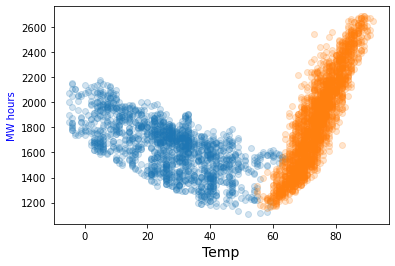

In [18]:
# question 3 make a scatter plot of energy and temperture with only some months 

train_mw = train['mw']
train_temp = train['Temp']
# can't do it thie way 
#train_jan = train[train['month'] == 1]
#train_jun = train[train['month'] == 7]


# need to use energy and temperture as my x and y 
# need to use where as a condition to get the specfic months we want as an index 
# not using set_labels or axes because its a scatter plot but we would if its a line plot as well as twinx
plt.subplot()
plt.scatter(train_temp.where(train['month'] == 1), train_mw.where(train['month'] == 1), alpha = 0.2)
plt.xlabel("Temp", fontsize=14)
#plt.ylabel("mw energy",fontsize=10)
#ax2=ax1.twinx() # this allows us to create a second axis 
plt.subplot()
plt.scatter(train_temp.where(train['month'] == 7), train_mw.where(train['month'] == 7), alpha = 0.2)
plt.ylabel("MW hours", color='blue', fontsize=10) # can't use set_label 

plt.show()
#sns.scatterplot(data=train, x="Temp", y="mw", hue=train[train['month'] == 1])

<ipython-input-19-fabf1bfb555e>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


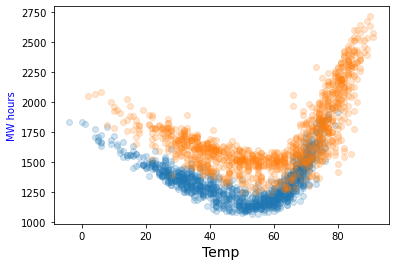

In [19]:
 # question 4 make a scatter plot with energy and temperture with hours of midnight and noon  
    
train_mw = train['mw']
train_temp = train['Temp']
# can't do it thie way 
#train_jan = train[train['month'] == 1]
#train_jun = train[train['month'] == 7]


# need to use energy and temperture as my x and y 
# need to use where as a condition to get the specfic months we want as an index 
# not using set_labels or axes because its a scatter plot but we would if its a line plot as well as twinx
plt.subplot()
# this is the midnight 
plt.scatter(train_temp.where(train['hour_of_day'] == 0), train_mw.where(train['hour_of_day'] == 0), alpha = 0.2)
plt.xlabel("Temp", fontsize=14)
#plt.ylabel("mw energy",fontsize=10)
#ax2=ax1.twinx() # this allows us to create a second axis 
plt.subplot()
# this is noon 
plt.scatter(train_temp.where(train['hour_of_day'] == 12), train_mw.where(train['hour_of_day'] == 12), alpha = 0.2)
plt.ylabel("MW hours", color='blue', fontsize=10) # can't use set_label 

plt.show()

In [14]:
# Question #5  build another liner model with more variables 
# we are using the interaction of the two variables now with this model 


# make a regression model 
mod = smf.ols(formula='mw ~ temp_stand + temp_squared + C(month) + C(day_of_week) + C(hour_of_day) + C(hour_of_day)*temp_stand + \
              C(hour_of_day) * temp_squared + C(month)*temp_stand + C(month)*temp_squared', data=train)
res_2 = mod.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2416.
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:33:12   Log-Likelihood:            -1.4959e+05
No. Observations:               25536   AIC:                         2.994e+05
Df Residuals:                   25425   BIC:                         3.003e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

With adding the interaction variables the adj r-squared increase to 0.912 
This is an improvement of the model I build before without the interaction variables 
This shows how some of the relationship of some variables  

In [36]:
# question #6 make another regression model 
# we are adding another interaction variables with energy and hour of the day 


mod = smf.ols(formula='mw ~ temp_stand + temp_squared + C(month) + C(day_of_week) + C(hour_of_day) + C(hour_of_day)*temp_stand + \
              C(hour_of_day) * temp_squared + C(month)*temp_stand + C(month)*temp_stand + C(month)*temp_squared + mw*C(hour_of_day)',\
              data=train)
res_3 = mod.fit()
print(res_3.summary())


                            OLS Regression Results                            
Dep. Variable:                     mw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.591e+29
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:28:57   Log-Likelihood:             6.2122e+05
No. Observations:               25536   AIC:                        -1.242e+06
Df Residuals:                   25401   BIC:                        -1.241e+06
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Adding the the last interaction variable of energy and hour it gave us an adj. R-squared of 1. The r-sqaured is 1 also which
tells us how well the predictions are with the new variables. The adj. r-squared is a more accurate model thats fits the current data.
Its showing a perfect corrlation so its possible we could have some overfitting going on.  

In [37]:
# question #7 get the predictions and calculate the MAPE(Mean absolute percentage error) for the model 
#from sklearn.linear_model import LinearRegression

# get the predictions 
# the directions say use train set but you are suppose to use the test set when doing the predictions  

train['ypred'] = res_3.predict(train)
train.head()

<ipython-input-37-c53393f91715>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ypred'] = res_3.predict(train)


,mw,Temp,year,month,day_of_week,hour_of_day,temp_stand,temp_squared,mape,ypred
Date,,,,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,2017,2,2,0,-0.871516,0.759540,4.323665e-13,1419.881
2017-02-01 01:53:00,1379.505,37.0,2017,2,2,1,-0.871516,0.759540,3.626098e-13,1379.505
2017-02-01 02:53:00,1366.106,36.0,2017,2,2,2,-0.924513,0.854723,6.158253e-13,1366.106
2017-02-01 03:53:00,1364.453,36.0,2017,2,2,3,-0.924513,0.854723,6.665636e-13,1364.453
2017-02-01 04:53:00,1391.265,36.0,2017,2,2,4,-0.924513,0.854723,4.249166e-13,1391.265


In [38]:
# Get the mape for the model 

# we are measureing the accuarcy of the model 
# and make it a column as well 
train['mape'] = np.abs((train['mw'] - train['ypred'])/train['mw'])*100
print(train['mape'].mean())


3.372891016630981e-13


<ipython-input-38-250ee8efafef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mape'] = np.abs((train['mw'] - train['ypred'])/train['mw'])*100


looks like the error of the prediction is 3.3% for the forcast energy of the model 

<ipython-input-40-47f99dc628f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['temp_stand'] = preprocessing.scale(test['Temp'])
<ipython-input-40-47f99dc628f9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['temp_squared'] = np.square(test['temp_stand'])
<ipython-input-40-47f99dc628f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<function matplotlib.pyplot.show(close=None, block=None)>

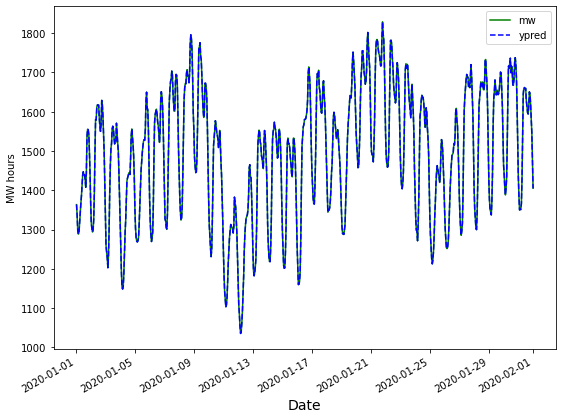

In [40]:
#question #8 make some forcasting with the test data set 

#get the predictions for the test set 
# need the temp stand column in the test data 
# First standardize the variable to avoid multicollinearity  
# standardization of dependent variables
test['temp_stand'] = preprocessing.scale(test['Temp'])
# make a quadrtic variable of temp 
test['temp_squared'] = np.square(test['temp_stand'])
#test.head()

# now we can the predictions 
test['ypred'] = res_3.predict(test)
#ypred_test.head()

# make a plot of the predicted test set data of energy values vs the actal values
#scatter isnt that good for results need another plot 
#plt.scatter(ypred_test, test['mw'], alpha = 0.2)
test['mw'].plot(color='green', figsize=(9,7))
plt.xlabel("Date", fontsize=14)
plt.ylabel("MW hours")
test['ypred'].plot(color='blue', linestyle='dashed', figsize=(9,7))
plt.legend()
plt.show

Get the MAPE for the test data as well and evaluate 

In [41]:
# mape for the test data set 

test['mape'] = abs((test['mw']-test['ypred'])/test['mw'])*100
print("Naive Model MAPE is: ", test['mape'].mean())

Naive Model MAPE is:  1.9349641470867564e-13


<ipython-input-41-fd4485f4b2a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mape'] = abs((test['mw']-test['ypred'])/test['mw'])*100
